# My first Artificial Neural Network in PyTorch

The required imports and dataset are already given:

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
#Ecerise: Creating tensors and matrix operations
tensor_size=3,3
tensor_size_2=2,3
my_first_tensor=torch.rand(tensor_size)
print(my_first_tensor)

b_tensor=torch.rand(tensor_size_2)
print('tensor2 with',b_tensor.shape)

tensor([[0.2823, 0.8887, 0.5734],
        [0.0724, 0.3820, 0.8402],
        [0.5418, 0.1588, 0.6956]])
tensor2 with torch.Size([2, 3])


In [3]:
#multiplication
result= torch.matmul(b_tensor, my_first_tensor)
print(result)

tensor([[0.5093, 0.8865, 1.4866],
        [0.4338, 0.5943, 1.1258]])


In [4]:
#Initialize a tensor
data=np.matrix('1 2; 3 4')#or
data1=np.array([[1,2],[3,4]])
print(data1)
print(data)
tensor_np=torch.from_numpy(data)#into tensors
print(tensor_np)
#tensor for pytorch needed for ann
tensor_np.numpy() #back to numpy if needed for output



[[1 2]
 [3 4]]
[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


array([[1, 2],
       [3, 4]])

[0.70201864 0.03185951 0.92735285]
[2 4 6]


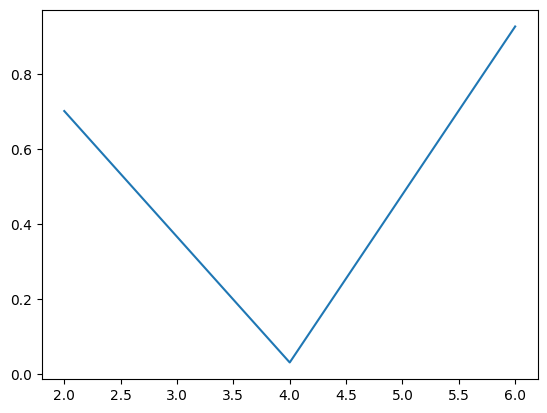

In [6]:
array=np.arange(2,8,2)
rand=np.random.random(3)
print(rand)
print(array)
#plt.figure()
plt.plot(array,rand)
#plt.show()

# Train/ Test Split
Which function should you use to split the data into test and train data?

In [4]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 42)

# Create tensors from the data
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Defining a Neural Network Model
Build a neural network the PyTorch way:
 - Define the class called ANN which inherits from nn.Module
 - In the __init__() method, define the parameters for the two fully connected layers.
 - In the .forward() method, do the forward step

 The network structure should be:
 1) Fully Connected Layer (4 input features (number of features in X), 16 output features (arbitrary))
 2) Fully Connected Layer (16 input features (number of output features from the previous layer), 12 output features (arbitrary))
 3) Output Layer (12 input features (number of output features from the previous layer), 3 output features (number of distinct classes))

 Use the ReLU for the activation function.

In [26]:
# Define the class called ANN which inherits from nn.Module# 
from turtle import forward


class ANN(nn.Module):
    def __init__(self):
        super(ANN,self).__init__()
        self.fc1=nn.Linear(4,16)
        self.fc2=nn.Linear(16,12)
        self.output=nn.Linear(12,3)

    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.output(x)
        return x

# Model Training
We use the cross entropy loss as loss function for our classification problem.
As optimization algorithm, we use Adam with a learning rate of 0.01

In [27]:
model = ANN()

# loss function
criterion = nn.CrossEntropyLoss()

# loss optimization - set the learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01) #lr=eta

model

ANN(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=3, bias=True)
)

The model will be trained for 100 epochs for keeping track of time and loss. 
Every 10 epochs the console outputs the current status — indicating on which epoch are we and what’s the current loss.
The following code outputs every 100 epochs 

In [29]:
%%time
epochs = 100
loss_arr = []

for i in range(epochs):
   y_hat = model.forward(X_train)
   loss = criterion(y_hat, y_train)
   loss_arr.append(loss)
 
   if i % 10 == 0:
       print(f'Epoch: {i} Loss: {loss}')
 
# backpropagation - update weights and biases so the model can actually "learn"
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

Epoch: 0 Loss: 0.05559211224317551
Epoch: 10 Loss: 0.054777614772319794
Epoch: 20 Loss: 0.055783264338970184
Epoch: 30 Loss: 0.053582217544317245
Epoch: 40 Loss: 0.05320705845952034
Epoch: 50 Loss: 0.05279766395688057
Epoch: 60 Loss: 0.05233215168118477
Epoch: 70 Loss: 0.05197157710790634
Epoch: 80 Loss: 0.051625773310661316
Epoch: 90 Loss: 0.05129443481564522
CPU times: total: 438 ms
Wall time: 116 ms


# Model Evaluation
In the evaluation process, we want to somehow keep track of predictions made by the model. We’ll need to iterate over the X_test and make a prediction, and then later compare it to the actual value.
We will use torch.no_grad() here because we’re just evaluating — there’s no need to update weights and biases.

In [30]:
preds = []
with torch.no_grad():
   for val in X_test:
       y_hat = model.forward(val)
       preds.append(y_hat.argmax().item())

We make a Pandas DataFrame with the following attributes:
    Y: actual value
    YHat: predicted value
    Correct: flag, 1 indicating Y and YHat match, 0 otherwise

In [35]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds})

df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]

# Display the first 5 rows of df
df.head()


,Y,YHat,Correct
0,1,1,1
1,0,0,1
2,2,2,1
3,1,1,1
4,1,1,1


How do we calculate the accuracy of the model?
Sum up the Correct column and divide it with the length of df:

In [46]:
# print the accuracy
afacc= df['Correct'].sum()/len(df)
print("The accuracy of our model is " + str(afacc))

The accuracy of our model is 1.0


The accuracy of our model on previously unseen data is 100%. 
Why? The Iris dataset is utterly simple to classify. We cannot state that Neural networks are the best algorithm for this dataset.
We might say that NN is an overkill for this type of problem, but that’s a discussion for another time.

Et voilà - the most simple neural network we will ever write with:
- perfect and clean dataset
- no missing values
- fewest layers and neurons